In [ ]:
import nltk
from nltk.corpus import stopwords
!pip install lime sklearn pandas numpy git+https://github.com/Desklop/Uk_Stemmer tensorflow nltk

Loading dataset


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\artem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Preprocessing dataset
0        us aid foreign countries consist military assi...
1        recent appearance new hampshire democratic pre...
2        us sen ted cruz wants people know texas — cali...
3        instagram post attributes dystopian statement ...
4        election day glitch eastern pennsylvania socia...
                               ...                        
23635    richardson led successful effort raise teacher...
23636    indeed economists found top tier americans ear...
23637    debate south carolina tancredo said could matc...
23638    certainly risky claim fatherhood major policy ...
23639    milwaukee parental choice program established ...
Name: text, Length: 23640, dtype: object
Stemming dataset
Splitting dataset
Training dataset


C:\Users\artem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Evaluating dataset
F1 Score =  0.8427079824856853
Accuracy Score =  0.8024534686971235
Precision Score =  0.776536312849162
Recall Score =  0.9212076583210603
Explaining dataset
[21714  5075 12283 ...  4725  2783 13590]
Document id: 0
Probability(Sciense) = 0.8247803747448414
Original prediction: 0.8247803747448414
Prediction removing some features: 0.8247803747448414
Difference: 0.0


acc 0.8024534686971235
f1 0.8427079824856853


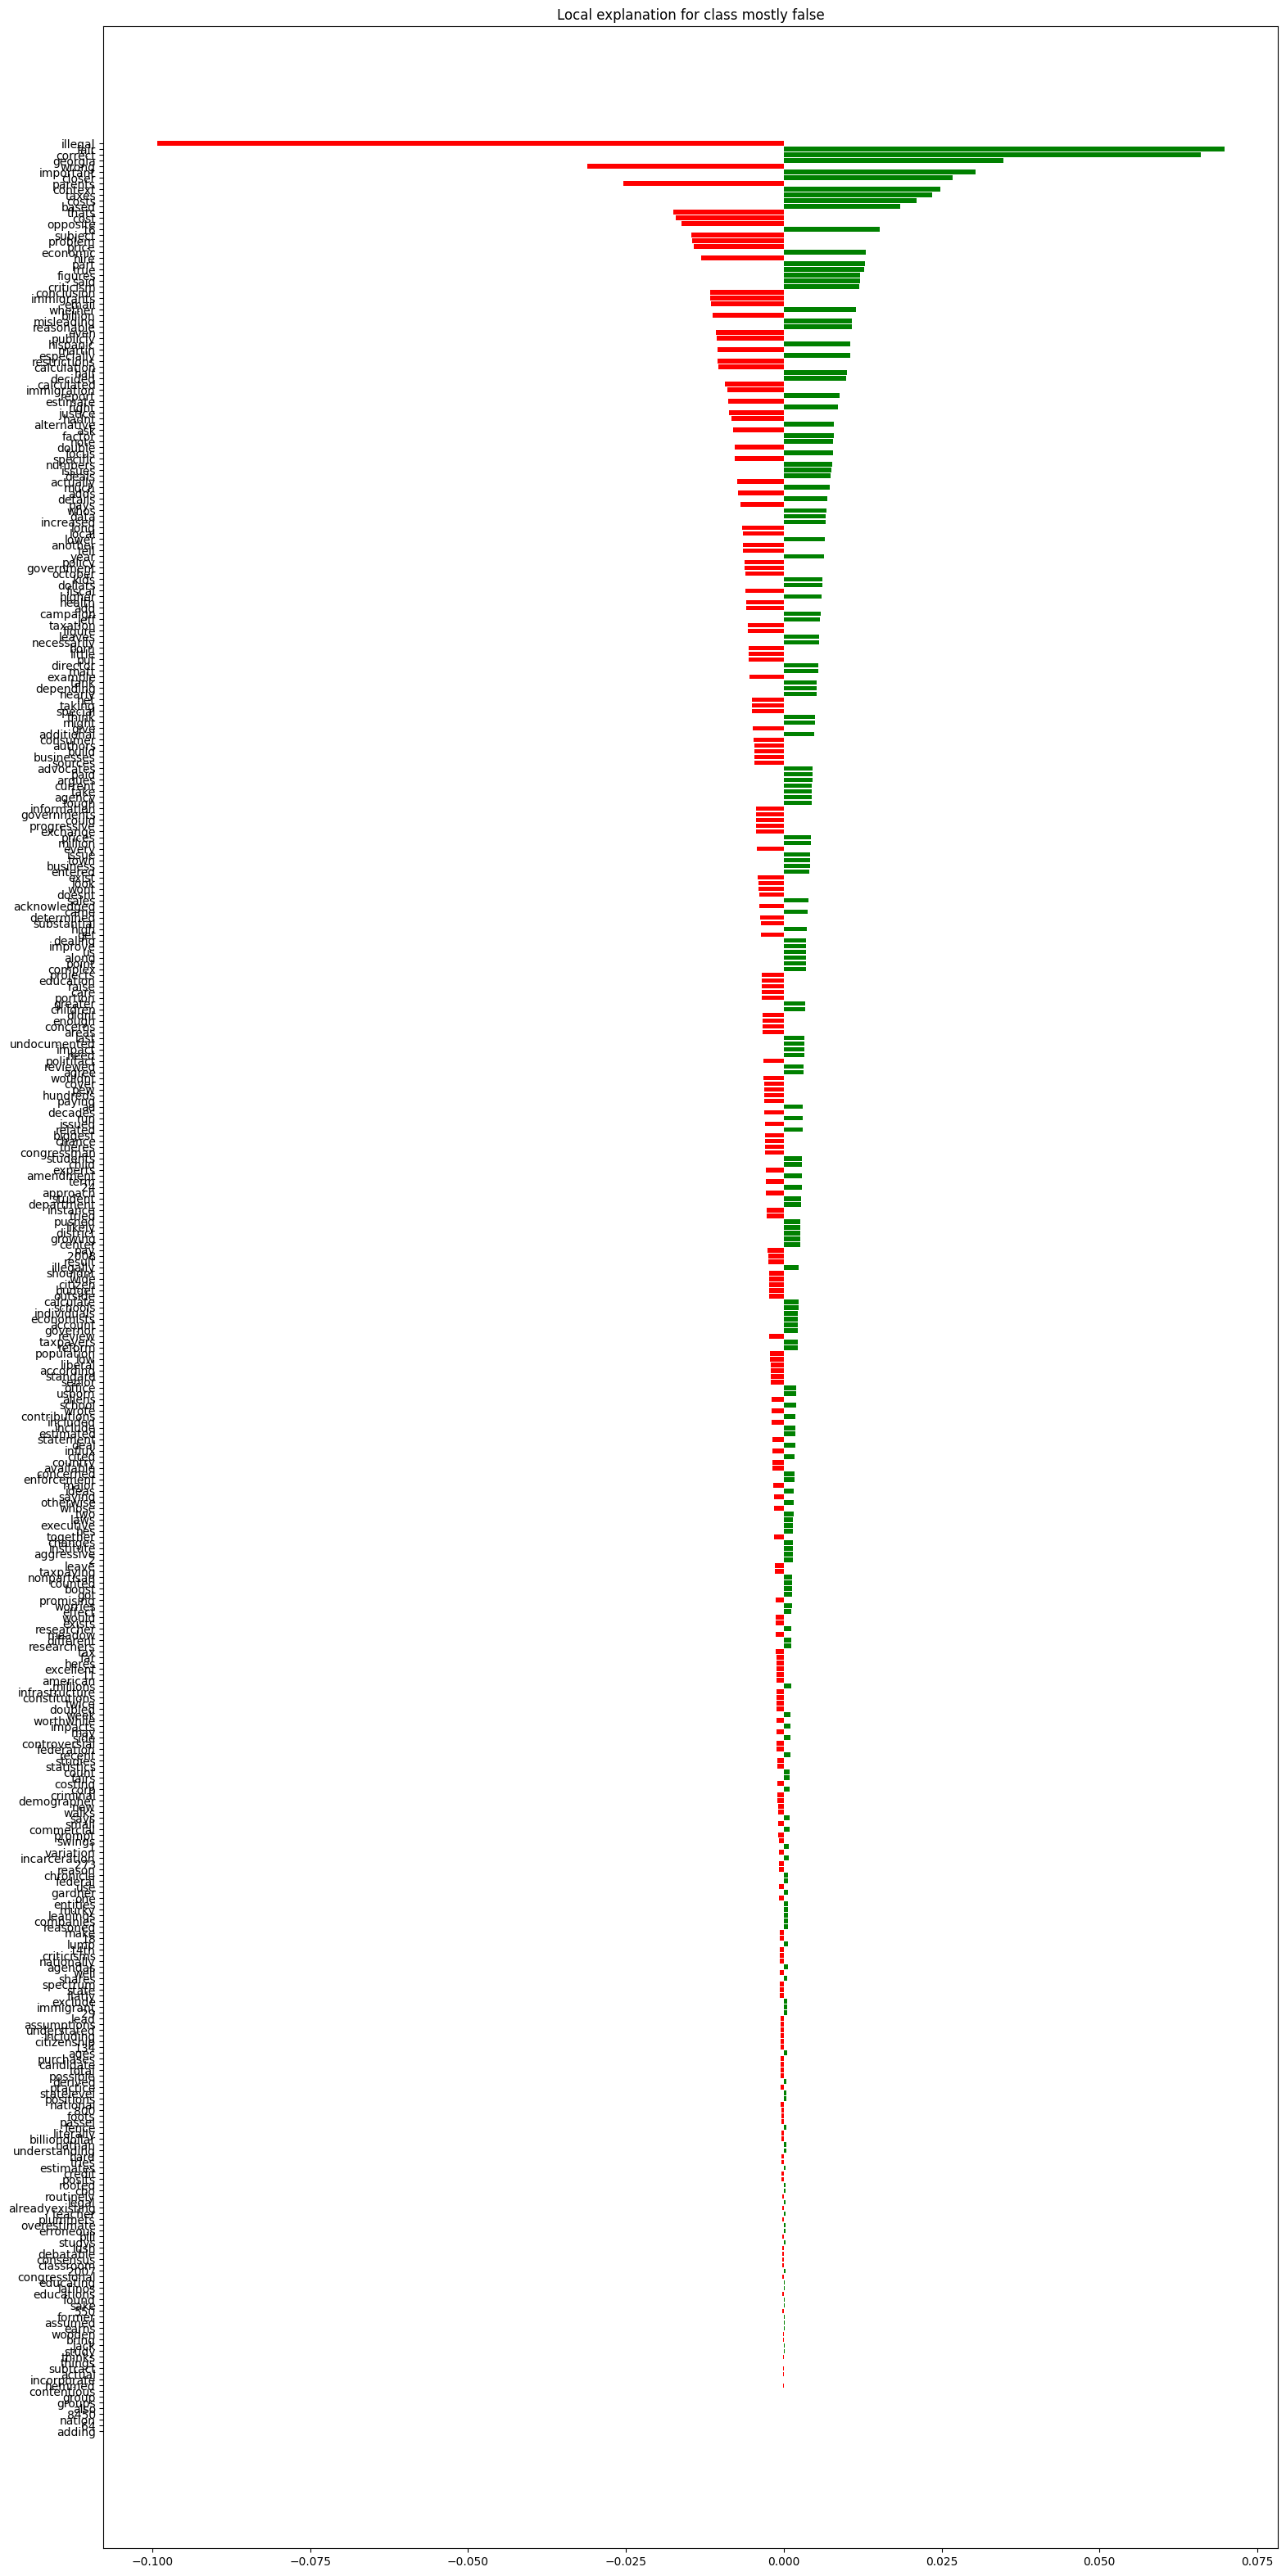

In [10]:
from __future__ import print_function
import re
import lime
import sklearn
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import sklearn.ensemble
import sklearn.metrics
import sklearn.feature_extraction.text
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVR
from sklearn.svm import SVC
from lime import lime_text
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer
import nltk

def remove_links(text):
    return re.sub(r'http\S+', '', text)

#data = pd.read_csv("https://docs.google.com/spreadsheets/d/1TSpzR1juNcdcL_08TbUvKTpsfdMQPohdhVqO5rmPGEY/gviz/tq?tqx=out:csv&sheet=Mirniy_Vovchok")
print('Loading dataset')
data = pd.read_csv('./Bases/result.csv')

a1 = []
f1 = []
class_names = ['mostly true',  'mostly false']
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))
print('Preprocessing dataset')
data.dropna(subset=['text'], inplace=True)
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(lowercase=False, min_df=0.01, max_df=0.95)
data['text'] = data['text'].str.lower()
def remove_links(text):
    return re.sub(r'http\S+', '', text)
data['text'] = data['text'].apply(remove_links)
data['text'] = data['text'].apply(lambda x: re.sub(r'[.,:;"\'!?\-’“%()]', '', x).split())
def remove_stopwords(text):
    # word_tokens = nltk.word_tokenize(text)
    filtered_text = [word for word in text if word not in stop_words]
    return ' '.join(filtered_text)
data['text'] = data['text'].apply(remove_stopwords)
data_x = data['text']


print(data['text'])

print('Stemming dataset')
data_xx=[]
for v in data_x:
    from uk_stemmer import UkStemmer

    stemmer = nltk.LancasterStemmer()

    test_string=v
    test_string.replace('we rated that attribution', '')
    test_string.replace('we rated a claim that gates', '')
    test_string.replace('we rated that claim', '')
    test_string.replace('we rated that', '')
    test_string.replace('we rated a similar statement', '')
    test_string.replace('we rated his statement', '')
    test_string.replace('we rated the statement', '')
    test_string.replace('we rated it', '')
    test_string.replace('mostly true', '')
    test_string.replace('we rated', '')
    test_string.replace('false', '')
    test_string.replace('pants on fire', '')
    test_string.replace('mostly false', '')
    test_string.replace('half true', '')
    test_string.replace('true', '')
    test_string.replace('barely true', '')
    test_string.replace('mostly true', '')
    test_string.replace('full flop', '')
    test_string.replace('no flip', '')
    test_string.replace('half flip', '')
    
    # get_test_string = prepare_test_string.replace('європейська', '')
    # get_test_string = prepare_test_string.replace('європейська правда', '')
    # get_test_string = prepare_test_string.replace('правда', '')
    # get_test_string = prepare_test_string.replace('економічна', '')
    # get_test_string = prepare_test_string.replace('економічна правда', '')
    # get_test_string = prepare_test_string.replace('цензор', '')
    # get_test_string = prepare_test_string.replace('нет', '')
    # get_test_string = prepare_test_string.replace('цензор.нет', '')
    # words = re.split(r'(\W)', get_test_string)
    words = [word for word in str(v) if word != '']

    for i in range(len(words)):
        words[i] = stemmer.stem(words[i])

    stem_test_string = ''.join(words)
    #print('Source: %s\nStemmed: %s' % (test_string, stem_test_string))

    data_xx.append(stem_test_string)


#data_x=np.array(data_xx)
data_x = np.array(data_xx)

data_y = data['target_numeric']

kf = ShuffleSplit(n_splits=1, test_size=0.1, random_state=0)

print('Splitting dataset')

for train_index, test_index in kf.split(data_x,data_y):
    x_train, x_test = data_x[train_index], data_x[test_index]
    y_train, y_test = data_y[train_index], data_y[test_index]
    
    x_train_vectorized = vectorizer.fit_transform(x_train)
    x_test_vectorized = vectorizer.transform(x_test)
    
    clf = SVC(kernel='linear', probability=True, cache_size=200, max_iter=10000)
    print('Training dataset')
    clf.fit(x_train_vectorized, y_train)
    y_pred = clf.predict(x_test_vectorized)
    print('Evaluating dataset')
    score_accuracy = accuracy_score(y_test, y_pred)
    score_f1 = sklearn.metrics.f1_score(y_test, y_pred, average='binary')
    score_precision = precision_score(y_test, y_pred, average='binary')
    score_recall = recall_score(y_test, y_pred, average='binary')
    
    a1.append(score_accuracy)
    f1.append(score_f1)

    print('F1 Score = ', score_f1)
    print('Accuracy Score = ', score_accuracy)
    print('Precision Score = ', score_precision)
    print('Recall Score = ', score_recall)

    print('Explaining dataset')
    c = make_pipeline(vectorizer, clf)
    explainer = LimeTextExplainer(class_names=class_names)
    print(test_index)
    idx = 0
    
    exp = explainer.explain_instance(x_test[idx], c.predict_proba, num_features=400)
    
    print('Document id: %d' % idx)
    print('Probability(Sciense) =', c.predict_proba([x_test[idx]])[0,1])
    #print('True class: %s' % class_names[y_test[idx]])
    print('Original prediction:', clf.predict_proba(x_test_vectorized[idx])[0,1])
    
    tmp = x_test_vectorized[idx].copy()
    
    print('Prediction removing some features:', clf.predict_proba(tmp)[0,1])
    print('Difference:', clf.predict_proba(tmp)[0,1] - clf.predict_proba(x_test_vectorized[idx])[0,1])

    %matplotlib inline
    fig = exp.as_pyplot_figure()
    fig.set_size_inches(18.5, 40)
    exp.save_to_file("1.html")
    exp.show_in_notebook(text=True)

    exp.as_list()
print("acc",np.average(a1))
print("f1",np.average(f1))